<h1 style="text-align:center">My Titanic Approach (Top 6%)</h1>

<div style="text-align:center;"><img src="https://upload.wikimedia.org/wikipedia/commons/6/6e/St%C3%B6wer_Titanic.jpg" /></div>

# Overview

**Context:** 
> The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

**About the Data:**

<ul>
    <li>survival:	Survival</li>
        <ul>
            <li>0 = No</li>
            <li>1 = Yes </li>
        </ul>
    <li>pclass: A proxy for socio-economic status (SES)</li>
        <ul>
            <li>1 = 1st (Upper)</li>
            <li>2 = 2nd (Middle)</li>
            <li>3 = 3rd (Lower)</li>
        </ul>
    <li>sex: Sex</li>
    <li>age: Age in years. Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5</li>
    <li>sibsp: # of siblings / spouses aboard the Titanic. The dataset defines family relations in this way:</li>
        <ul>
            <li>Sibling = brother, sister, stepbrother, stepsister</li>
            <li>Spouse = husband, wife (mistresses and fiancés were ignored)</li>
        </ul>
    <li>parch: # of parents / children aboard the Titanic. The dataset defines family relations in this way:</li>
        <ul>
            <li>Parent = mother, father</li>
            <li>Child = daughter, son, stepdaughter, stepson</li>
            <li>Some children travelled only with a nanny, therefore parch=0 for them.</li>
        </ul>
    <li>ticket: Ticket number</li>
    <li>fare:	Passenger fare</li>
    <li>cabin: Cabin number</li>
    <li>embarked: Port of Embarkation</li>
        <ul>
            <li>C = Cherbourg</li>
            <li>Q = Queenstown</li>
            <li>S = Southampton</li>
        </ul>
</ul> 


# Imports

In [307]:
# Data Processing
import numpy as np 
import pandas as pd 

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')

# Modeling
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score

from sklearn.model_selection import RandomizedSearchCV

# Getting the data

In [308]:
df_train = pd.read_csv("/kaggle/input/titanic/train.csv")
df_test = pd.read_csv("/kaggle/input/titanic/test.csv")

# Exploring the data

In [309]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [310]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Target Value: Survived

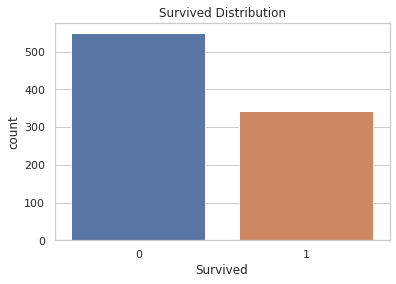

In [311]:
b = sns.countplot(x='Survived', data=df_train)
b.set_title("Survived Distribution");

### Pclass

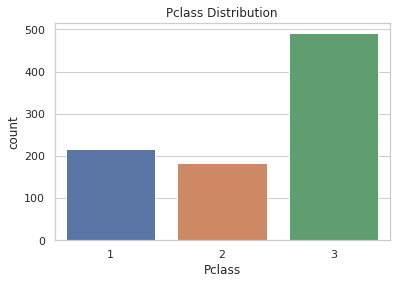

In [312]:
b = sns.countplot(x='Pclass', data=df_train)
b.set_title("Pclass Distribution");

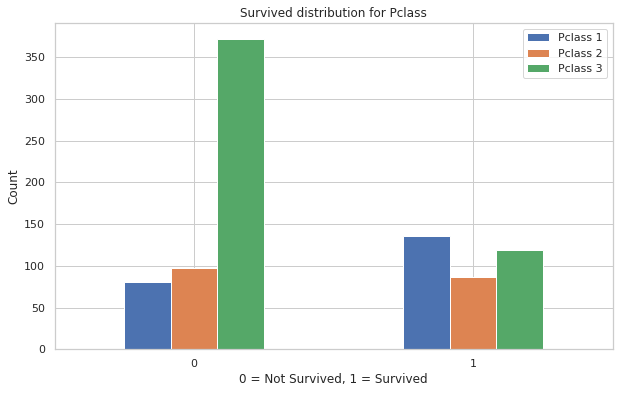

In [313]:
pd.crosstab(df_train['Survived'], df_train['Pclass']).plot(kind="bar", figsize=(10,6))

plt.title("Survived distribution for Pclass")
plt.xlabel("0 = Not Survived, 1 = Survived")
plt.ylabel("Count")
plt.legend(["Pclass 1", "Pclass 2", "Pclass 3"])
plt.xticks(rotation=0);

Here, we can see that more of Pclass 1 survived than died and a lot more passengers of Pclass 3 died than survived. Pclass 2 is distributed relatively even.

### Sex

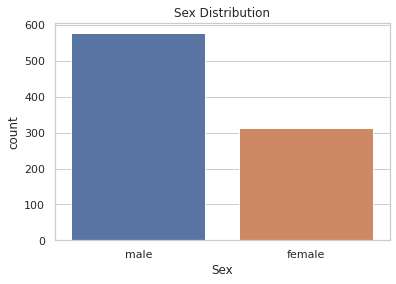

In [314]:
b = sns.countplot(x='Sex', data=df_train)
b.set_title("Sex Distribution");

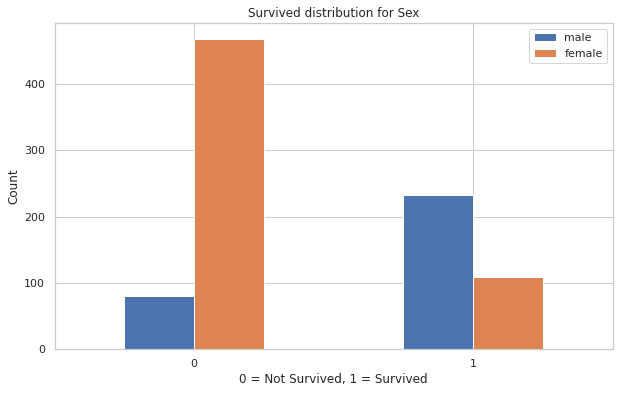

In [315]:
pd.crosstab(df_train['Survived'], df_train['Sex']).plot(kind="bar", figsize=(10,6))

plt.title("Survived distribution for Sex")
plt.xlabel("0 = Not Survived, 1 = Survived")
plt.ylabel("Count")
plt.legend(["male", "female"])
plt.xticks(rotation=0);

We can see that the majority of female passenger survived and the majority of male passenger died.

### Age

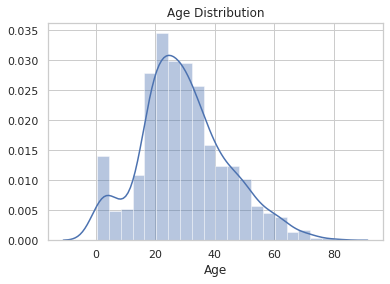

In [316]:
b = sns.distplot(df_train['Age'])
b.set_title("Age Distribution");

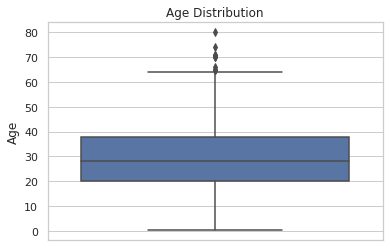

In [317]:
b = sns.boxplot(y = 'Age', data = df_train)
b.set_title("Age Distribution");

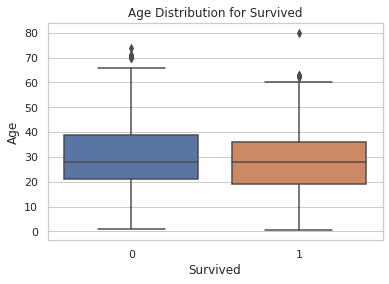

In [318]:
b = sns.boxplot(y='Age', x='Survived', data=df_train);
b.set_title("Age Distribution for Survived");

### SibSp

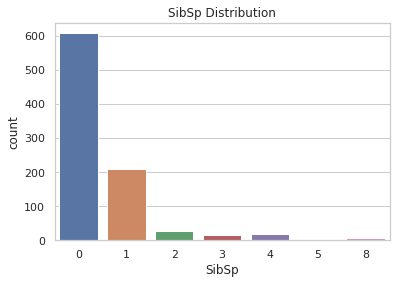

In [319]:
b = sns.countplot(x='SibSp', data=df_train)
b.set_title("SibSp Distribution");

In [320]:
pd.crosstab(df_train['Survived'], df_train['SibSp']).value_counts()

0    1    2   3   4   5  8
398  97   15  12  15  5  7    1
210  112  13  4   3   0  0    1
dtype: int64

### Parch

In [321]:
df_train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

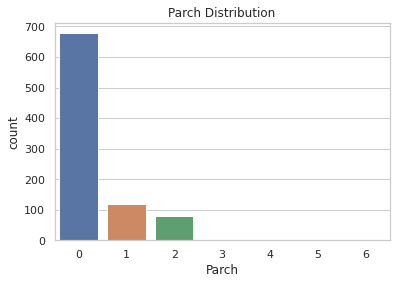

In [322]:
b = sns.countplot(x='Parch', data=df_train)
b.set_title("Parch Distribution");

In [323]:
pd.crosstab(df_train['Survived'], df_train['Parch']).value_counts()

0    1   2   3  4  5  6
445  53  40  2  4  4  1    1
233  65  40  3  0  1  0    1
dtype: int64

### Fare

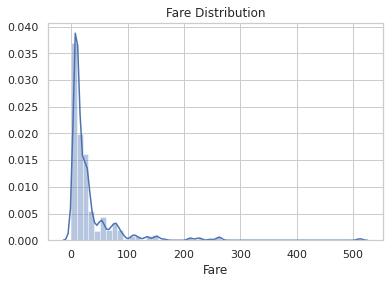

In [324]:
b = sns.distplot(df_train['Fare'])
b.set_title("Fare Distribution");

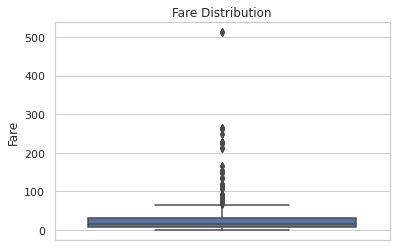

In [325]:
b = sns.boxplot(y = 'Fare', data = df_train)
b.set_title("Fare Distribution");

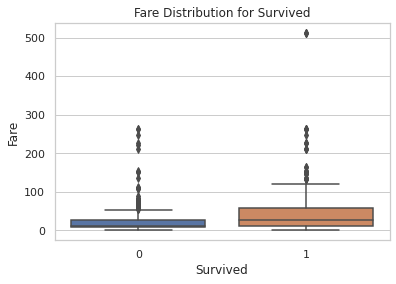

In [326]:
b = sns.boxplot(y='Fare', x='Survived', data=df_train);
b.set_title("Fare Distribution for Survived");

### Embarked

In [327]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

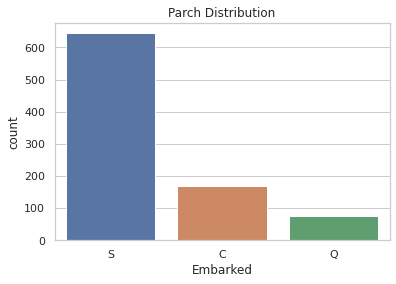

In [328]:
b = sns.countplot(x='Embarked', data=df_train)
b.set_title("Parch Distribution");

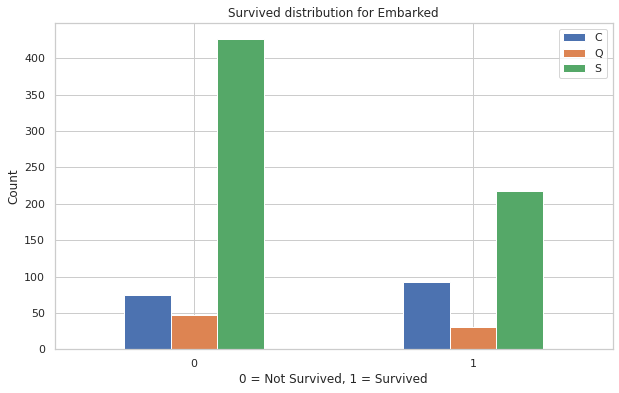

In [329]:
pd.crosstab(df_train['Survived'], df_train['Embarked']).plot(kind="bar", figsize=(10,6))

plt.title("Survived distribution for Embarked")
plt.xlabel("0 = Not Survived, 1 = Survived")
plt.ylabel("Count")
plt.legend(["C", "Q", "S"])
plt.xticks(rotation=0);

## Handling NaN values

**Where do we have NaN values?**

In [330]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [331]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Let's replace the NaN values in `Age` with the mean value.**

In [332]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())

**Let's replace the NaN values in `Cabin` with "Missing".**

In [333]:
df_train['Cabin'] = df_train['Cabin'].fillna("Missing")
df_test['Cabin'] = df_test['Cabin'].fillna("Missing")

**Let's get rid of columns with NaN in `Embarked`in `df_train`.**

In [334]:
df_train = df_train.dropna()

**Let's replace the NaN value in `Fare` in `df_test` with the mean value.**

In [335]:
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean())

**Let's check if there are any NaN values left.**

In [336]:
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [337]:
df_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [338]:
df_train.shape

(889, 12)

In [339]:
df_test.shape

(418, 11)

**It looks like everything worked!**

# Cleaning the data

In [340]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Missing,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Missing,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Missing,S


In [341]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Missing,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,Missing,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Missing,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,Missing,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,Missing,S


Let's get rid of the `Name` column for now:

In [342]:
df_train = df_train.drop(columns=['Name'], axis=1)
df_test = df_test.drop(columns=['Name'], axis=1)

Let's map `Sex` to 0 for `male` and 1 for `female`:

In [343]:
sex_mapping = {
    'male': 0,
    'female': 1
}

df_train.loc[:, "Sex"] = df_train['Sex'].map(sex_mapping)
df_test.loc[:, "Sex"] = df_test['Sex'].map(sex_mapping)

Let's get rid of `Ticket` for now:

In [344]:
df_train = df_train.drop(columns=['Ticket'], axis=1)
df_test = df_test.drop(columns=['Ticket'], axis=1)

Let's get rid of `Cabin` for now:

In [345]:
df_train = df_train.drop(columns=['Cabin'], axis=1)
df_test = df_test.drop(columns=['Cabin'], axis=1)

In [346]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


In [347]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,Q
1,893,3,1,47.0,1,0,7.0000,S
2,894,2,0,62.0,0,0,9.6875,Q
3,895,3,0,27.0,0,0,8.6625,S
4,896,3,1,22.0,1,1,12.2875,S


In [348]:
df_test['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

Let's use one-hot-encoding for `Embarked` since those are nominal variables:

In [349]:
df_train = pd.get_dummies(df_train, prefix_sep="__",
                              columns=['Embarked'])
df_test = pd.get_dummies(df_test, prefix_sep="__",
                              columns=['Embarked'])

Let's check if everything worked:

In [350]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked__C,Embarked__Q,Embarked__S
0,1,0,3,0,22.0,1,0,7.2500,0,0,1
1,2,1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,3,1,26.0,0,0,7.9250,0,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,0,1


In [351]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked__C,Embarked__Q,Embarked__S
0,892,3,0,34.5,0,0,7.8292,0,1,0
1,893,3,1,47.0,1,0,7.0000,0,0,1
2,894,2,0,62.0,0,0,9.6875,0,1,0
3,895,3,0,27.0,0,0,8.6625,0,0,1
4,896,3,1,22.0,1,1,12.2875,0,0,1


# Modeling

In [352]:
# Everything except target variable
X = df_train.drop("Survived", axis=1)

# Target variable
y = df_train['Survived'].values

In [353]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 

In [354]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(max_iter=10000), 
          "Random Forest": RandomForestClassifier(),
          "SVC" : SVC(probability=True),
          "DecisionTreeClassifier" : DecisionTreeClassifier(),
          "AdaBoostClassifier" : AdaBoostClassifier(),
          "GradientBoostingClassifier" : GradientBoostingClassifier(),
          "GaussianNB" : GaussianNB(),
          "LinearDiscriminantAnalysis" : LinearDiscriminantAnalysis(),
          "QuadraticDiscriminantAnalysis" : QuadraticDiscriminantAnalysis()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Predicting target values
        y_pred = model.predict(X_test)
        # Evaluate the model and append its score to model_scores
        #model_scores[name] = model.score(X_test, y_test)
        model_scores[name] = roc_auc_score(y_pred, y_test)
    return model_scores

In [355]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

/opt/conda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


{'KNN': 0.5817398794142981,
 'Logistic Regression': 0.7649479233637648,
 'Random Forest': 0.7875487427726233,
 'SVC': 0.6654761904761904,
 'DecisionTreeClassifier': 0.7463538363982244,
 'AdaBoostClassifier': 0.7786687030673285,
 'GradientBoostingClassifier': 0.8005445881552076,
 'GaussianNB': 0.7496173469387756,
 'LinearDiscriminantAnalysis': 0.7752120026092628,
 'QuadraticDiscriminantAnalysis': 0.760969387755102}

`GradientBoostingClassifier` has the best score.

# Predict for df_test

In [356]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [357]:
y_pred = gbc.predict(df_test)

In [358]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [359]:
sub = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [360]:
sub['Survived'] = y_pred
sub.to_csv("results_titanic.csv", index=False)
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


**If you liked this notebook or found it helpful in any way, feel free to leave an upvote - That will keep me motivated :)**

**If you have any suggestions for improvement, leave a comment :)**